**CLUSTERING EMPLOYEE SEGMENTATION ON ABSENTEEISM**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
# Importing the all required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv",sep=';')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


---> Preprocessing:

In [7]:
#Checking the shape of data
df.shape

(740, 21)

In [8]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [9]:
# Summarizing the data
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [5]:
# Checking for null values
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

Here,we don't find any null values

In [6]:
# Checking for noise values
# function for noise values in each categorical data

for cols in list(df.columns):
    print(round(df[cols].value_counts()))
    print("---------------------------")

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
9       8
6       8
23      8
27      7
12      7
30      7
2       6
7       6
26      5
32      5
29      5
19      3
21      3
31      3
8       2
16      2
4       1
35      1
Name: ID, dtype: int64
---------------------------
23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64
---------------------------
3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64
---------------------------
2    161
4    156
3    154
6    144
5    125
Name: Day of th

Here,I don't find any noise data in the given dataset.

In [16]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [117]:
# Dropping the id column:
df.drop(['ID'],axis=1,inplace=True)

**EDA**

---> Univariate Analysis:

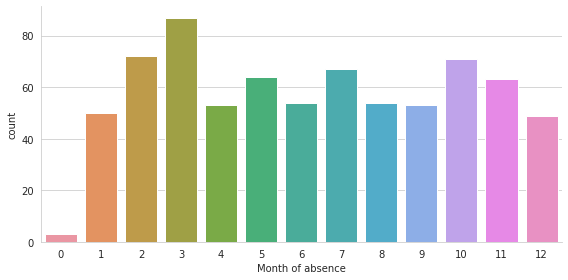

In [34]:
sns.set_style("whitegrid")
sns.factorplot(data=df, x='Month of absence', kind= 'count',size=4,aspect=2)

plt.show()

In the month "3" we have high count.

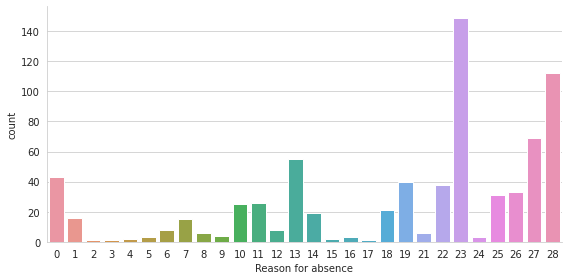

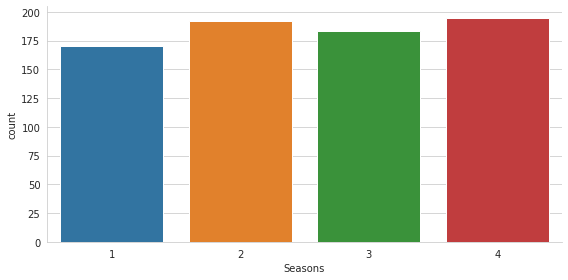

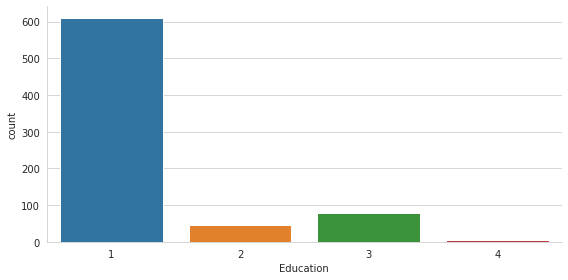

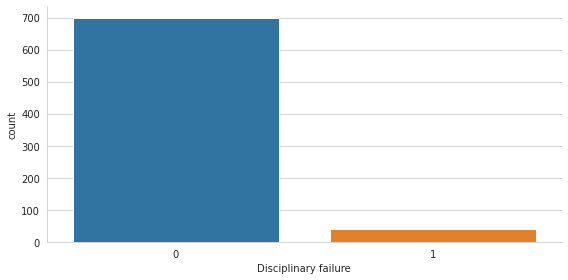

In [15]:
#Check the bar graph of categorical Data using factorplot
sns.set_style("whitegrid")
sns.factorplot(data=df, x='Reason for absence', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Seasons', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Education', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Disciplinary failure', kind= 'count',size=4,aspect=2)
plt.show()



*   From the plot ,reasons for absents '23' has the highest count.
*   The season 4 has highest count
*   The education 1 has the highest count
*   The non-disciplinary are high in count.





---> Bivariate Analysis:

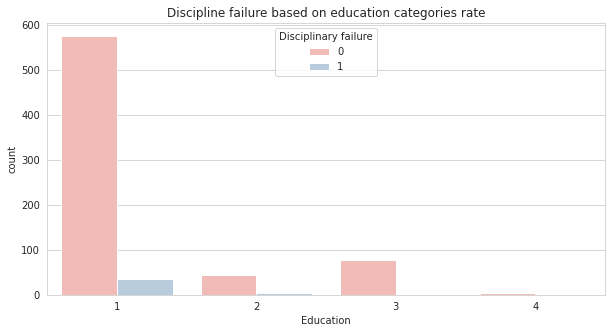

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='Education', hue='Disciplinary failure', data=df, palette="Pastel1", )

plt.title("Discipline failure based on education categories rate")
plt.show()

From the plot, it can show that the education type "1" has the highest disciplinary failure.

Text(0.5, 1.0, 'Plot discipline failure rates on the day of the week')

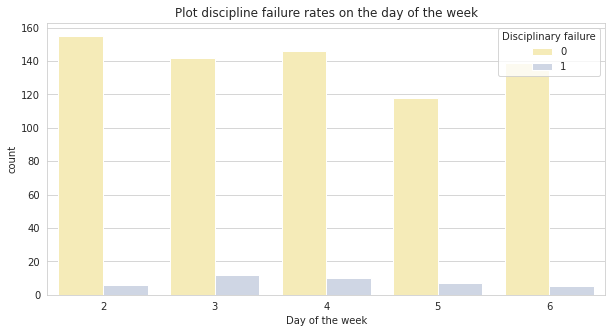

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='Day of the week', hue='Disciplinary failure', data=df, palette="Pastel2_r" )
plt.title("Plot discipline failure rates on the day of the week")

The day of week 2 has the highest non-disciplinary failure.In disciplinary 3 has highest count so in the day 3 many are getting absent.

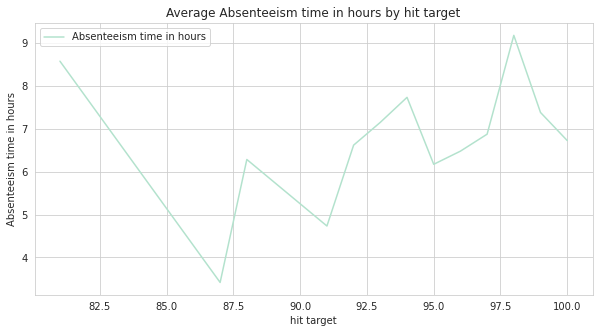

In [27]:
hit = df.groupby('Hit target')[['Absenteeism time in hours']].mean()
ax = hit.plot(kind='line', figsize=(10,5), legend=True,colormap="Pastel2", )
ax.set_xlabel('hit target')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by hit target') 
plt.show()


-->The employees who are completing there target morethan 80% are getting absent.

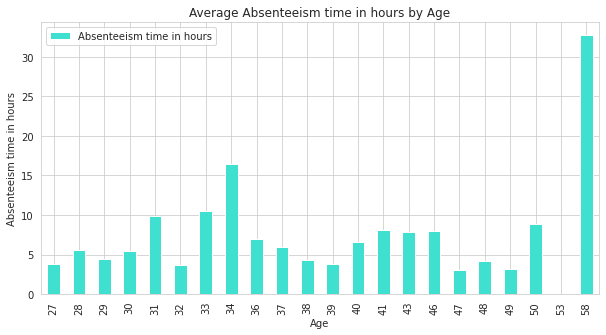

In [28]:
data_age =df.groupby('Age')[['Absenteeism time in hours']].mean()
ax = data_age.plot(kind='bar', figsize=(10,5), legend=True, color="turquoise" )
ax.set_xlabel('Age')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by Age')
plt.show()


The employees with age "58" are getting high absenteesim in hours.

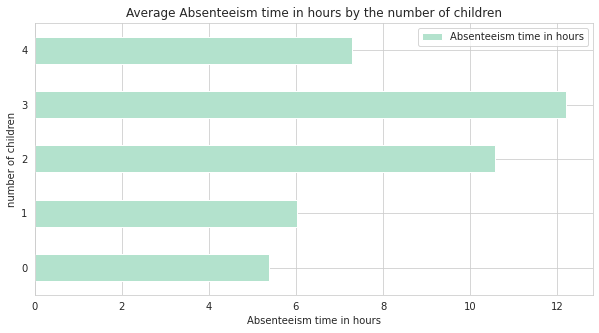

In [31]:
data_son = df.groupby('Son')[['Absenteeism time in hours']].mean()
ax = data_son.plot(kind='barh', figsize=(10,5), legend=True, colormap="Pastel2" )
ax.set_xlabel('Absenteeism time in hours')
ax.set_ylabel('number of children')
ax.set_title('Average Absenteeism time in hours by the number of children')
plt.show()

The employee who has three children are getting more absenteesim time in hours.

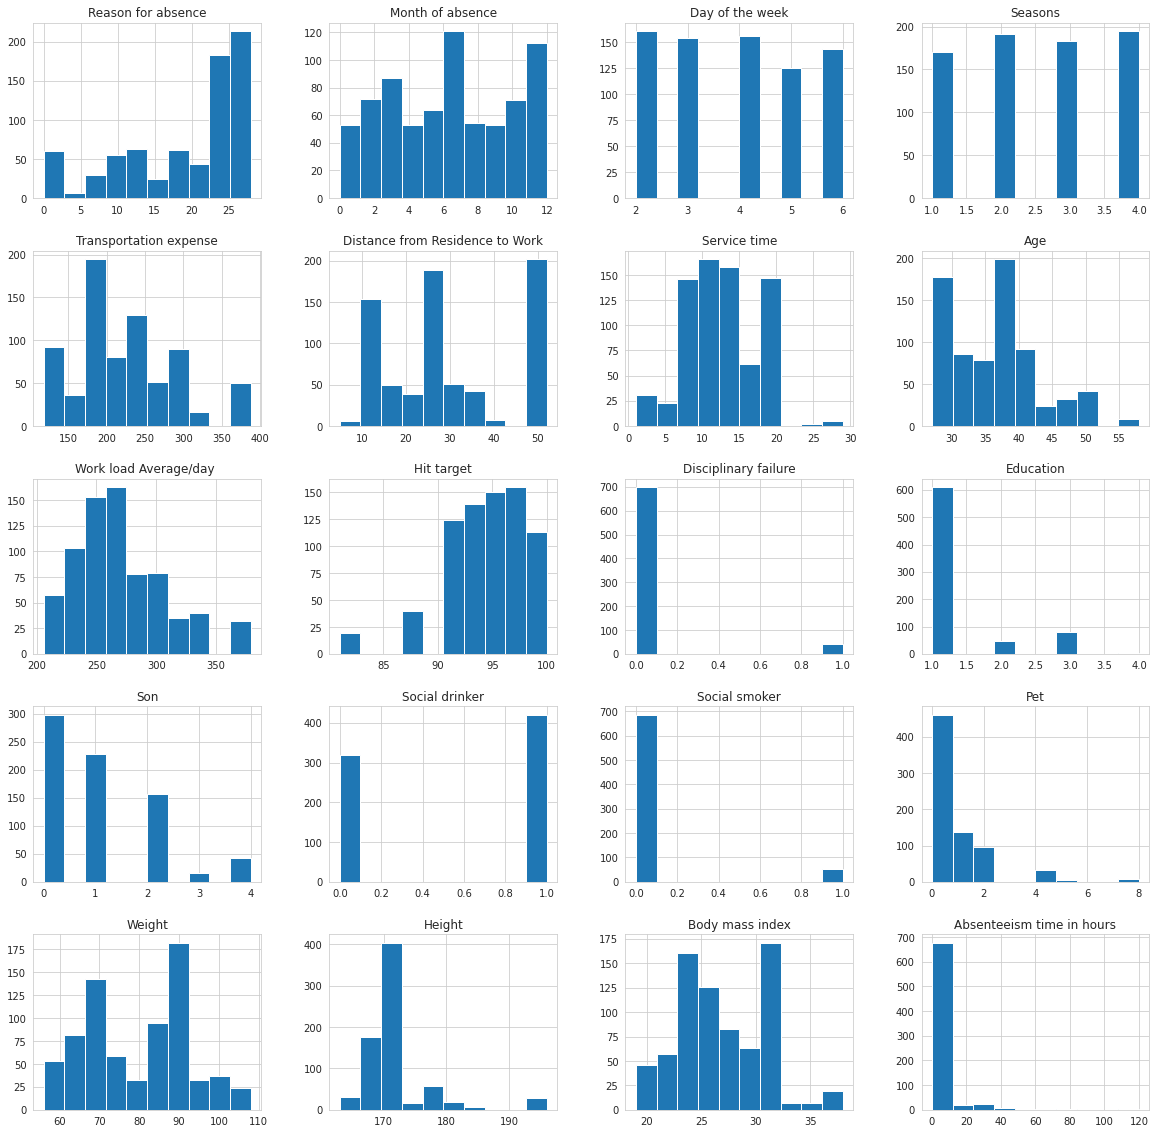

In [209]:
df.hist(figsize=(20,20))
plt.show()

The data was not distributed normally so we can go through minmax scaler normalization.

In [118]:
#Feature Scaling
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df.to_numpy()),columns=df.columns)

In [119]:
scaled_df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0.928571,0.583333,0.25,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.033333
1,0.000000,0.583333,0.25,0.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579,0.000000
2,0.821429,0.583333,0.50,0.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.000,0.634615,0.212121,0.631579,0.016667
3,0.250000,0.583333,0.75,0.0,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.0,0.50,1.0,1.0,0.000,0.230769,0.151515,0.263158,0.033333
4,0.821429,0.583333,0.75,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.016667


---> PCA

In [162]:
#PCA
pca = PCA(n_components=2)
df_r = pca.fit(scaled_df).transform(scaled_df)
Explained_var = pca.explained_variance_ratio_
Explained_var


array([0.22278234, 0.1228392 ])

In [163]:
df_r = pd.DataFrame(df_r)
df_r

,0,1
0,-0.574166,-0.416506
1,-0.446411,-0.071841
2,-0.643213,-0.539195
3,-0.147293,-0.134326
4,-0.585176,-0.362148
...,...,...
735,-0.554470,-0.251808
736,0.643607,-0.318877
737,-0.359695,-0.474615
738,-0.583114,-0.159557


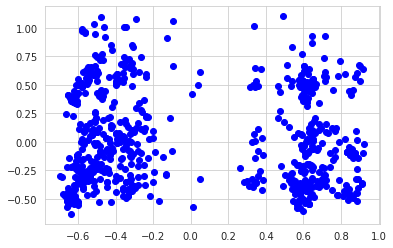

In [164]:
plt.scatter(df_r[0],df_r[1],c='blue')

**Clustering:**

**--> K-Means Algorithm**

---> On Extracted data:

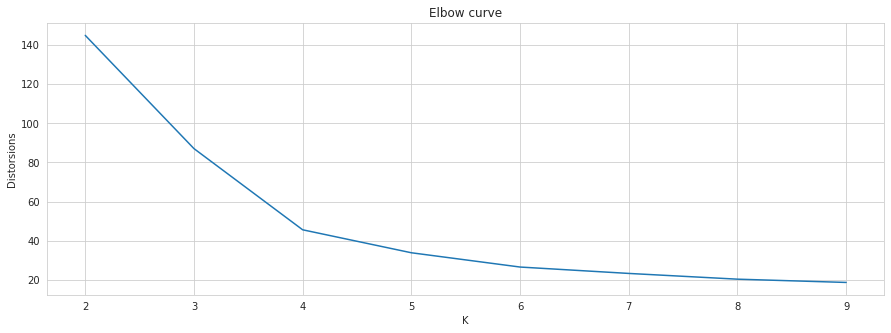

In [165]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_r)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

For n_clusters = 2 The average silhouette_score is : 0.5729927835449604
For n_clusters = 3 The average silhouette_score is : 0.5557162368165438
For n_clusters = 4 The average silhouette_score is : 0.5772612336040017
For n_clusters = 5 The average silhouette_score is : 0.5351405175017686
For n_clusters = 6 The average silhouette_score is : 0.5036275136513882
For n_clusters = 7 The average silhouette_score is : 0.48114013644853004


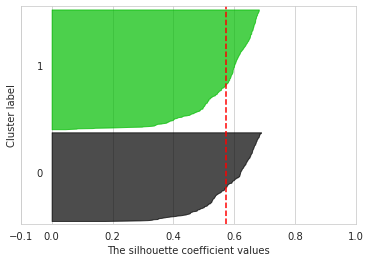

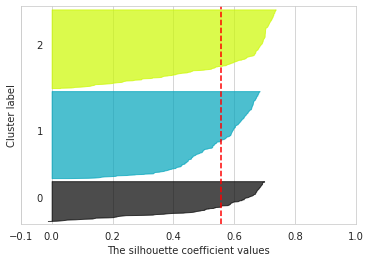

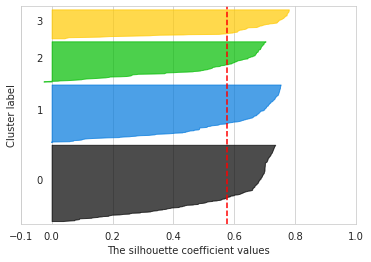

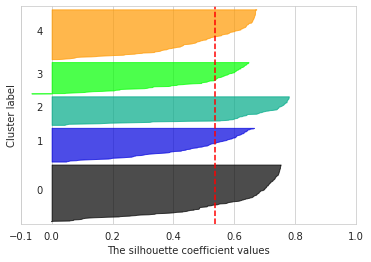

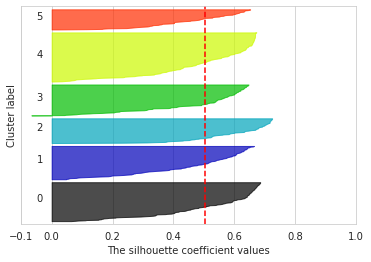

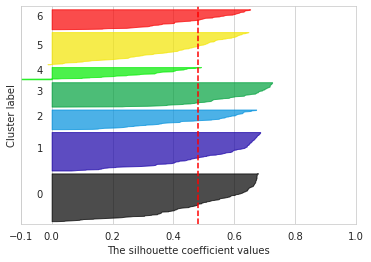

In [166]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_r) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_r)

    silhouette_avg = silhouette_score(df_r, cluster_labels) #silhoutte score
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_r, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()



*   From the above graphs of elbow and silhouette , here we can take 3 clusters(k).
*   I'm considering k as 3 for modelling.



In [167]:
#Model building
Kmeans_pca_r = KMeans(n_clusters=4)
Kmeans_pca_r.fit(df_r)

KMeans(n_clusters=4)

Text(0.5, 1.0, 'PCA')

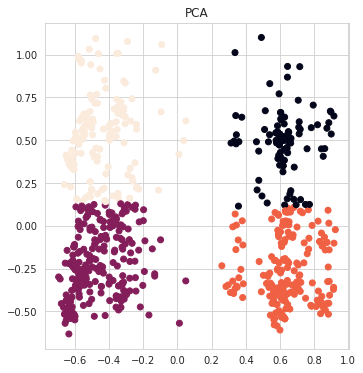

In [168]:
# plot for kmeans on reduced data
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(df_r[0],df_r[1],c=Kmeans_pca_r.labels_)
plt.title("PCA")



Original data

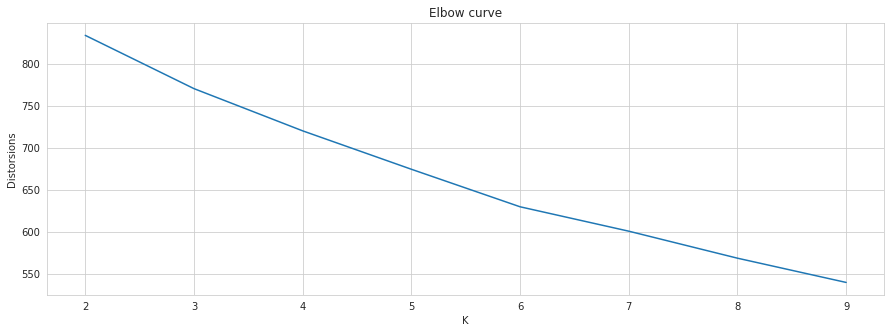

In [127]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

For n_clusters = 2 The average silhouette_score is : 0.21231848033799988
For n_clusters = 3 The average silhouette_score is : 0.16548553774192581
For n_clusters = 4 The average silhouette_score is : 0.1369031844022222
For n_clusters = 5 The average silhouette_score is : 0.13562710539894574
For n_clusters = 6 The average silhouette_score is : 0.1236359785427348
For n_clusters = 7 The average silhouette_score is : 0.12094214108663802


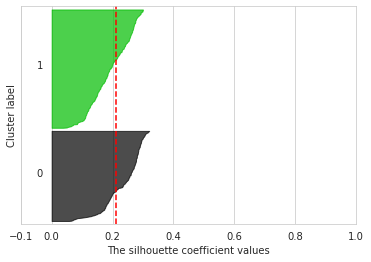

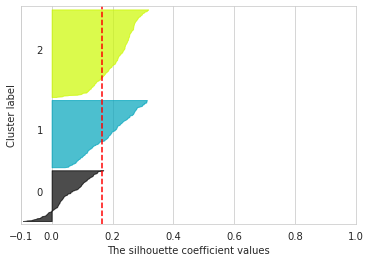

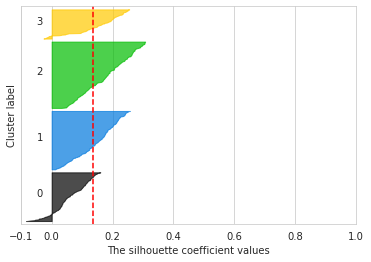

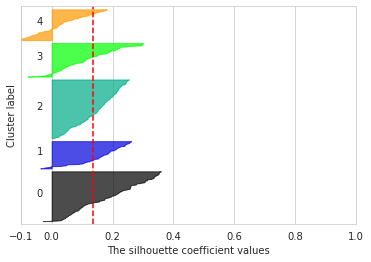

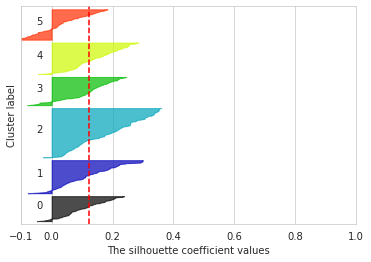

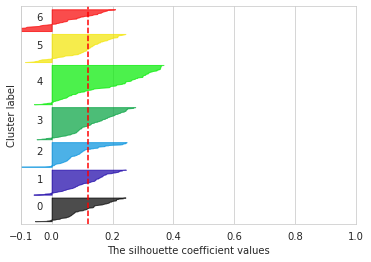

In [85]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(scaled_df) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_r)

    silhouette_avg = silhouette_score(scaled_df, cluster_labels) #silhoutte score
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

By observing the elbow and silhouette score here I'm considering k as 3 in modelling.

In [128]:
#Model building
Kmeans_O = KMeans(n_clusters=3)
Kmeans_O.fit(scaled_df)

KMeans(n_clusters=3)

In [183]:
# Silhouette scores:
print("Origial Silhouette score =",round(silhouette_score(scaled_df,Kmeans_O.labels_),2))
print("Reduction Silhouette score(PCA) =",round(silhouette_score(df_r,Kmeans_pca_r.labels_),2))

Origial Silhouette score = 0.17
Reduction Silhouette score(PCA) = 0.58


 **Agglomerative**

In [131]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

---> On Extracted Data:

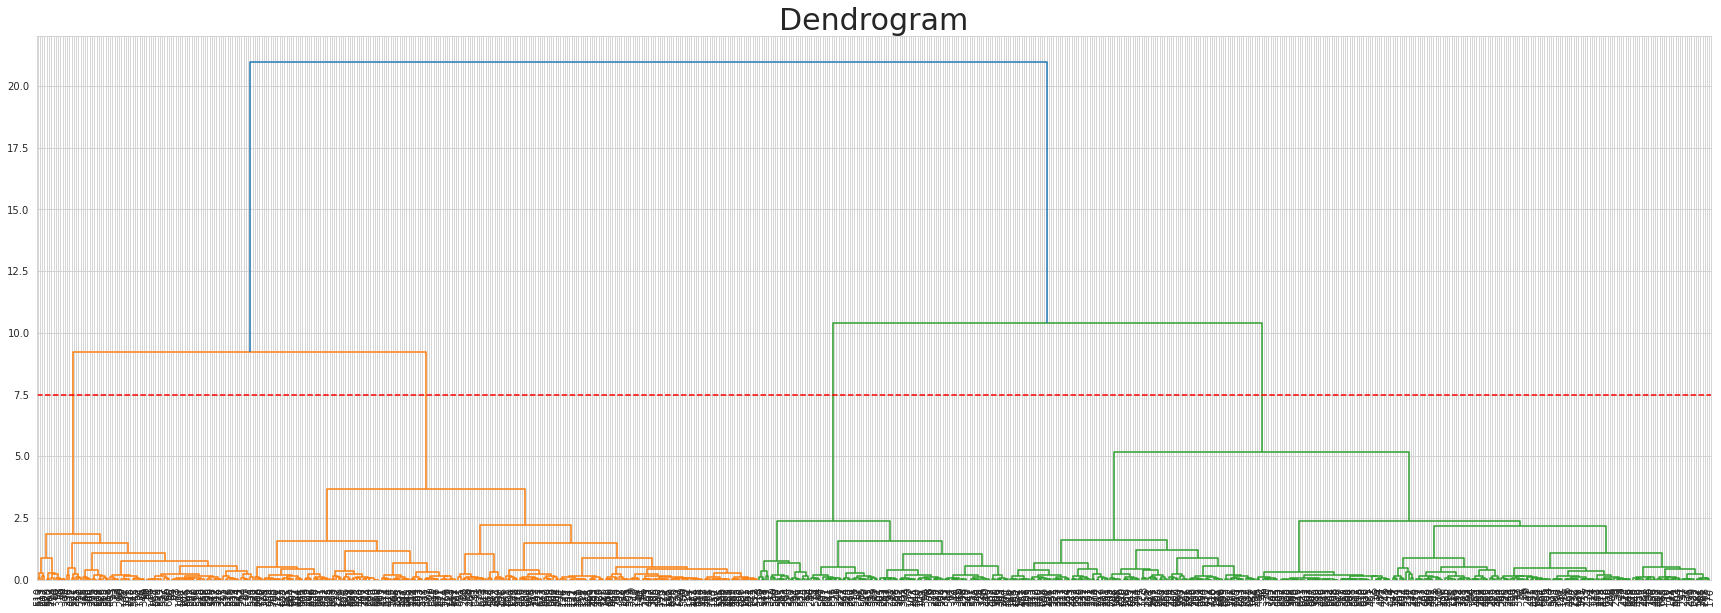

In [245]:
# PCA
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df_r, method = 'ward'),labels=df_r.index)
plt.axhline(y=7.5, color='r', linestyle='--')
ax = plt.gca()# used to create current polar axis on current figure
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)

plt.show()

here I'm cutting the dendogram at the threshold value of 7.5.Here I'm getting 4 clusters.

In [235]:
# Model Building
HC_r_pca = AgglomerativeClustering(n_clusters=4)
HC_r_pca.fit(df_r)

AgglomerativeClustering(n_clusters=4)

Text(0.5, 1.0, 'PCA')

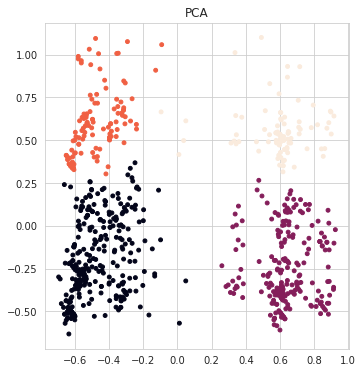

In [236]:
#Plot of reduced data
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(df_r[0],df_r[1],c=HC_r_pca.labels_,s=15)
plt.title("PCA")

----> On Original Data:

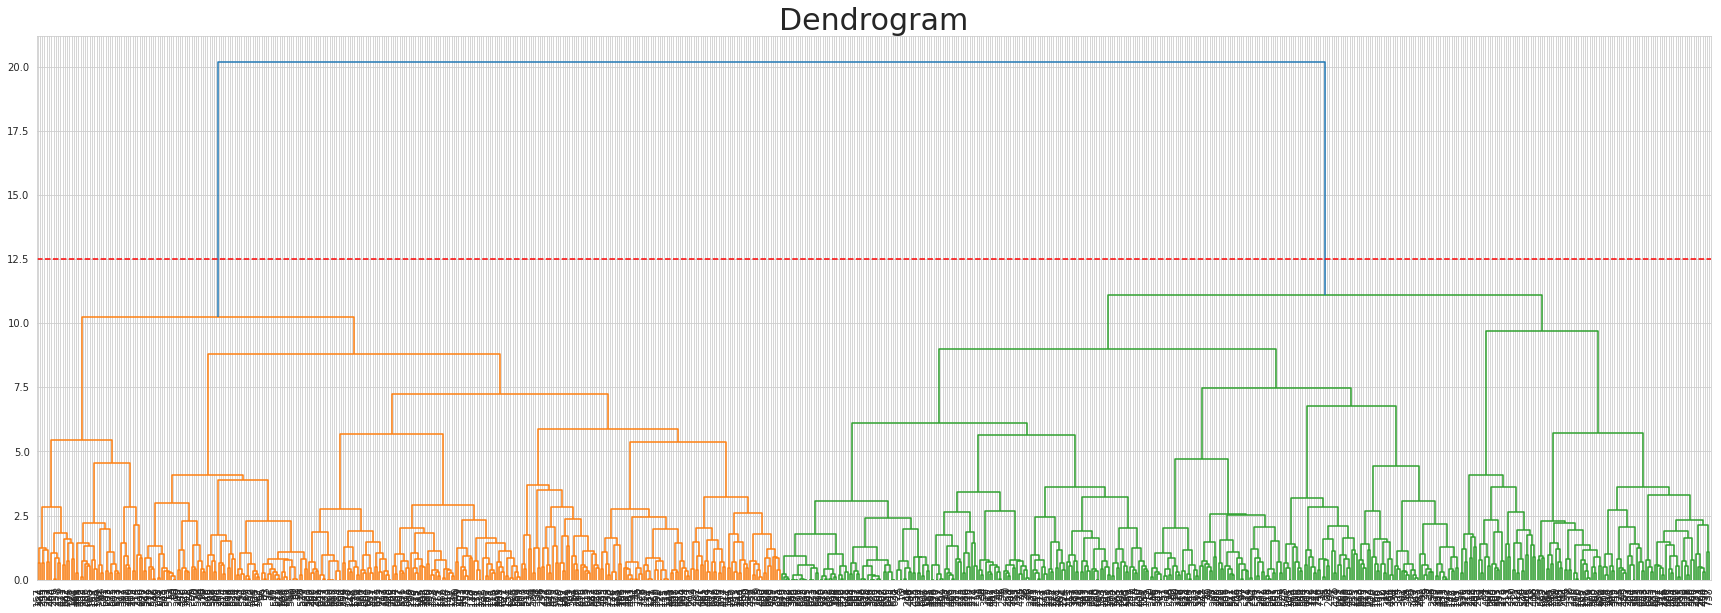

In [214]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(scaled_df, method = 'ward'),labels=scaled_df.index)
plt.axhline(y=12.5, color='r', linestyle='--')
ax = plt.gca()# used to create current polar axis on current figure
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)

plt.show()

Here I'm cutting the dendogram at the threshold value of 12.5 and I'm getting 2 clusters.

In [234]:
# Model Building
HC_O = AgglomerativeClustering(n_clusters=2)
HC_O.fit(scaled_df)

AgglomerativeClustering()

In [237]:
# Silhouette Scores:
print("Origial Silhouette score =",round(silhouette_score(scaled_df,HC_O.labels_),2))
print("Reduction Silhouette score(PCA) =",round(silhouette_score(df_r,HC_r_pca.labels_),2))

Origial Silhouette score = 0.2
Reduction Silhouette score(PCA) = 0.58


 **DBSCAN**

---> On Reduced data:

In [191]:
neigh_pca = NearestNeighbors(n_neighbors=2)
nbrs_pca = neigh_pca.fit(df_r)
distances_pca, indices_pca = nbrs_pca.kneighbors(df_r)

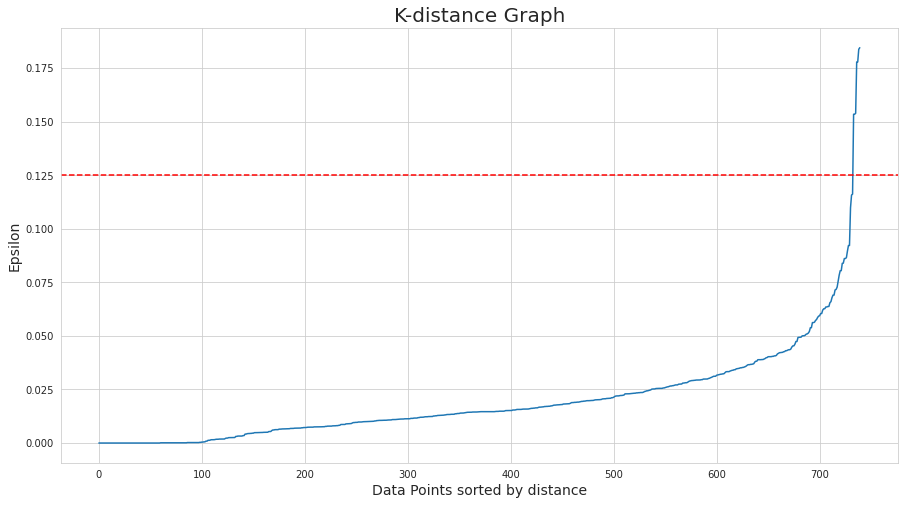

In [202]:
# Plotting K-distance Graph
distances1 = np.sort(distances_pca, axis=0)
distances1 = distances1[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances1)

plt.axhline(y=0.125, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Here,I'm cutting the graph at threshold of 0.125.

In [199]:
eps1=[0.125,0.150,0.154]

for eps in eps1:
  for min_samples in range(9,15):
    clusterer= DBSCAN(eps=eps,min_samples = min_samples)
    cluster_labels = clusterer.fit_predict(df_r)
    labels = clusterer.labels_
    x=cluster_labels+2
    y=np.bincount(x)
    ii=np.nonzero(y)[0]
    results=list(zip(ii,y[ii]))
    print("eps =",eps,'|min_samples=',min_samples,'|obtained clustering:',len(results))
    print('silehoutte score ',silhouette_score(df_r,labels))

eps = 0.125 |min_samples= 9 |obtained clustering: 4
silehoutte score  0.3653267251603292
eps = 0.125 |min_samples= 10 |obtained clustering: 4
silehoutte score  0.3653267251603292
eps = 0.125 |min_samples= 11 |obtained clustering: 4
silehoutte score  0.3634226942896569
eps = 0.125 |min_samples= 12 |obtained clustering: 3
silehoutte score  0.45365490449064527
eps = 0.125 |min_samples= 13 |obtained clustering: 3
silehoutte score  0.4539235792136855
eps = 0.125 |min_samples= 14 |obtained clustering: 4
silehoutte score  0.4793553730983602
eps = 0.15 |min_samples= 9 |obtained clustering: 3
silehoutte score  0.43182515277446765
eps = 0.15 |min_samples= 10 |obtained clustering: 3
silehoutte score  0.4400090201722043
eps = 0.15 |min_samples= 11 |obtained clustering: 3
silehoutte score  0.4400090201722043
eps = 0.15 |min_samples= 12 |obtained clustering: 3
silehoutte score  0.44306549892740754
eps = 0.15 |min_samples= 13 |obtained clustering: 3
silehoutte score  0.44306549892740754
eps = 0.15 |m

From the above output,I'm selcting the min_samples which have highest silhouette score.here,I'm getting high silhouette score for eps=0.125,min_samples=14.No.of clusters is 3.

In [200]:
# Model Building
dbscan_r_pca = DBSCAN(eps=0.125,min_samples=14)
dbscan_r_pca.fit(df_r)

DBSCAN(eps=0.125, min_samples=14)

Text(0.5, 1.0, 'PCA')

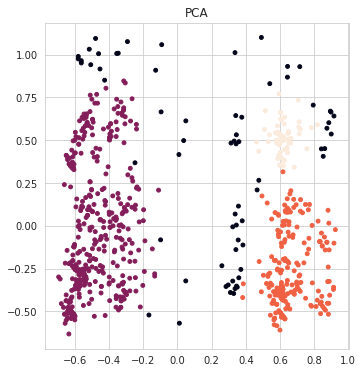

In [201]:
#Plots for reduced data
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(df_r[0],df_r[1],c=dbscan_r_pca.labels_,s=15)
plt.title("PCA")

---> On Original Data:

In [144]:
neigh_O = NearestNeighbors(n_neighbors=2)
nbrs_O = neigh_O.fit(scaled_df)
distances_O, indices_O = nbrs_O.kneighbors(scaled_df)

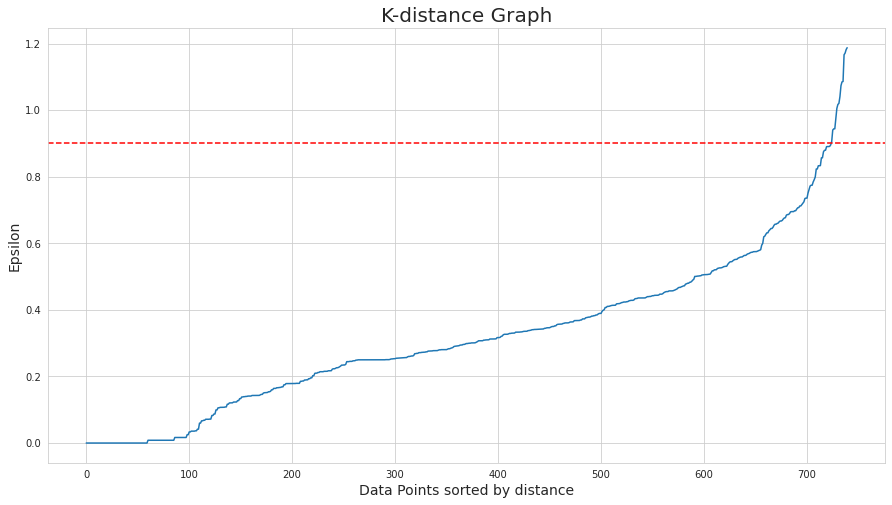

In [246]:
# Plotting K-distance Graph
distances1 = np.sort(distances_O, axis=0)
distances1 = distances1[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances1)

plt.axhline(y=0.9, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Here,I'm cutting the graph at threshold of o.9 to get optimum samples.

In [148]:
eps1=[0.59,0.78,0.9,1.0]

for eps in eps1:
  for min_samples in range(9,20):
    clusterer= DBSCAN(eps=eps,min_samples = min_samples)
    cluster_labels = clusterer.fit_predict(scaled_df)
    labels = clusterer.labels_
    x=cluster_labels+2
    y=np.bincount(x)
    ii=np.nonzero(y)[0]
    results=list(zip(ii,y[ii]))
    print("eps =",eps,'|min_samples=',min_samples,'|obtained clustering:',len(results))
    print('silehoutte score ',silhouette_score(scaled_df,labels))

eps = 0.59 |min_samples= 9 |obtained clustering: 10
silehoutte score  -0.03746936688781433
eps = 0.59 |min_samples= 10 |obtained clustering: 9
silehoutte score  -0.03733230022844148
eps = 0.59 |min_samples= 11 |obtained clustering: 9
silehoutte score  -0.03897189856075568
eps = 0.59 |min_samples= 12 |obtained clustering: 8
silehoutte score  -0.07934896407867581
eps = 0.59 |min_samples= 13 |obtained clustering: 8
silehoutte score  -0.0880608979456126
eps = 0.59 |min_samples= 14 |obtained clustering: 7
silehoutte score  -0.07190294097640375
eps = 0.59 |min_samples= 15 |obtained clustering: 7
silehoutte score  -0.07106020170001656
eps = 0.59 |min_samples= 16 |obtained clustering: 7
silehoutte score  -0.061467896555882605
eps = 0.59 |min_samples= 17 |obtained clustering: 7
silehoutte score  -0.0629007629688815
eps = 0.59 |min_samples= 18 |obtained clustering: 6
silehoutte score  -0.07327137927108598
eps = 0.59 |min_samples= 19 |obtained clustering: 6
silehoutte score  -0.07481130962324065


From the above output,I'm getting high silhouette score for eps = 0.9 and min_samples=17 with 2 clusters and some outliers.

In [149]:
# Model Building
dbscan_O = DBSCAN(eps=0.9,min_samples=17)
dbscan_O.fit(scaled_df)

DBSCAN(eps=0.9, min_samples=17)

In [204]:
# Silhouette Scores:
print("Origial Silhouette score =",round(silhouette_score(scaled_df,dbscan_O.labels_),2))
print("Reduction Silhouette score(PCA) =",round(silhouette_score(df_r,dbscan_r_pca.labels_),2))

Origial Silhouette score = 0.19
Reduction Silhouette score(PCA) = 0.48


**Final Result:**

In [242]:
final_df = pd.DataFrame()

In [243]:
final_df['Models'] = ['Silhouette_score(RF)','Clusters(RF)','Silhouette_score(OF)','Clusters(OF)']
final_df['K-Means'] =['0.58','4','0.17','3']
final_df['Agglomerative']=['0.58','4','0.2','2']
final_df['DBSCAN']=['0.48','3','0.19','2']

In [244]:
final_df

,Models,K-Means,Agglomerative,DBSCAN
0,Silhouette_score(RF),0.58,0.58,0.48
1,Clusters(RF),4,4,3
2,Silhouette_score(OF),0.17,0.2,0.19
3,Clusters(OF),3,2,2


**Conclusion:**From the table,the "K-Means" and "Agglomerative Hierarchical" has the highest silhouette score for "Dimension reductionality data" when compared to other model.Here,according to silhouette score both the models are good models.

--->For Original features,"Agglomerative Hierarichal Algorithm" was the best model.Because it has high silhouette score when compared to remaining models.

----> In next step,by observing the plots,we can conclude any one model for Reduced data.

Text(0.5, 1.0, 'DBSCAN')

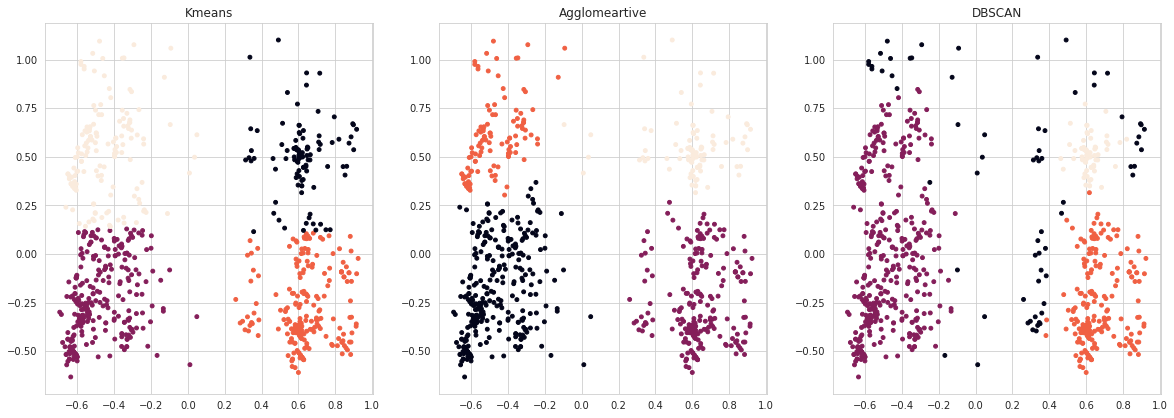

In [247]:
# Plots of all models of LDA
plt.figure(figsize=(20,15))
plt.subplot(231)
plt.scatter(df_r[0],df_r[1],c=Kmeans_pca_r.labels_,s=15)
plt.title("Kmeans")

plt.subplot(232)
plt.scatter(df_r[0],df_r[1],c=HC_r_pca.labels_,s=15)
plt.title("Agglomeartive")

plt.subplot(233)
plt.scatter(df_r[0],df_r[1],c=dbscan_r_pca.labels_,s=15)
plt.title("DBSCAN")

**Observation:**

---> From the plot,we can observe that 1st 2 plots were clustered properly.In those two the 2nd plot was clustered in proper way when compared to 1st plot.In 1st plot if we observe closely the datapoints with low distance are clasiified into another cluster but not with cluster having low distance.So,here the "Agglomerative Hierarichal Algorithm" will be the best model.

In [248]:
df['Cluster']=HC_r_pca.labels_

In [249]:
df['Cluster'].unique()

array([0, 1, 2, 3])



*   The data was clustered on the basis of education,weight,height,bmi,absettesm time in hours.
*   --> Cluster 0 = absentees with high amount of time
*   --> Cluster 1 = absentees with 2nd highest amount of time
*   --> Cluster 2 = absentees with 3rd highest amount of time
*   --> Cluster 3 = absentees with least amount of time






